<a href="https://colab.research.google.com/github/saysaw9/Data-Science-and-Decision-Make/blob/main/Sayali_Agrotech_DSDM_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('/Users/sayalisawant/Desktop/DSDM/Data.xlsx')

In [ ]:
df_plants = pd.read_excel("/Users/sayalisawant/Desktop/DSDM/Data.xlsx", sheet_name = "plants")
df_flight_dates = pd.read_excel("/Users/sayalisawant/Desktop/DSDM/Data.xlsx", sheet_name = "flight dates")
df_planting = pd.read_excel("/Users/sayalisawant/Desktop/DSDM/Data.xlsx", sheet_name = "planting")
df_weather = pd.read_excel("/Users/sayalisawant/Desktop/DSDM/Data.xlsx", sheet_name = "weather")

In [ ]:
df_plants  = df_plants.rename(columns = {'Batch Number': 'batch_num', 
                                   'Plant Date': 'plant_dt', 
                                   'Class': 'cls',
                                   'Fresh Weight (g)': 'fresh_wt', 
                                   'Head Weight (g)': 'head_wt',
                                   'Radial Diameter (mm)': 'radial_diam', 
                                   'Polar Diameter (mm)': 'polar_diam',
                                   'Diameter Ratio': 'diameter_rat', 
                                   'Leaves': 'leaves',
                                   'Density (kg/L)': 'density',
                                   'Leaf Area (cm^2)': 'leaf_area',
                                   'Square ID': 'square_id',
                                   'Check Date': 'check_date', 
                                   'Flight Date': 'flight_date',
                                   'Remove': 'remove'})

In [ ]:
df_plants

,batch_num,plant_dt,cls,fresh_wt,head_wt,radial_diam,polar_diam,diameter_rat,leaves,density,leaf_area,square_id,check_date,flight_date,remove
0,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,185.0,208,2020-04-30,NaT,NaN
1,402,2020-04-11,4,15.0,NaN,NaN,NaN,NaN,11.0,NaN,156.0,208,2020-04-30,NaT,NaN
2,402,2020-04-11,1,16.0,NaN,NaN,NaN,NaN,12.0,NaN,137.0,208,2020-04-30,NaT,NaN
3,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,225.0,208,2020-04-30,NaT,NaN
4,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,11.0,NaN,157.0,208,2020-04-30,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4854,738,2020-08-27,4,284.0,12.0,50.0,55.0,0.909091,NaN,NaN,430.0,1172,2020-10-20,NaT,NaN
4855,738,2020-08-27,5,199.0,8.0,45.0,85.0,0.529412,NaN,NaN,358.0,1172,2020-10-20,NaT,NaN
4856,738,2020-08-27,3,280.0,23.0,60.0,80.0,0.750000,NaN,NaN,417.0,1172,2020-10-20,NaT,NaN
4857,738,2020-08-27,4,247.0,10.0,45.0,80.0,0.562500,NaN,NaN,413.0,1172,2020-10-20,NaT,NaN


In [ ]:
df_weather  = df_weather.rename(columns = {'' :'weather_date',
                                     'Solar Radiation [avg]' : 'Solar_radiation',
                                     'Precipitation [sum]' : 'Precipitation',
                                     'Wind Speed [avg]' : 'Wind_speed_avg',
                                     'Wind Speed [max]' : 'Wind_speed_max',
                                     'Battery Voltage [last]' : 'Battery_voltage',
                                     'Leaf Wetness [time]' : 'Leaf_wetness',
                                     'Air Temperature [avg]' : 'Air_temp_avg',
                                     'Air Temperature [max]' : 'Air_temp_max',
                                     'Air Temperature [min]' : 'Air_temp_min',
                                     'Relative Humidity [avg]' : 'Relative_humidity',
                                     'Dew Point [avg]' : 'Dew_point_avg',
                                     'Dew Point [min]' : 'Dew_point_min',
                                     'ET0 [result]' : 'Et0_result' 
})

df_weather  = df_weather.rename(columns = {'Unnamed: 0' :'Weather_dt'})


In [ ]:
df_weather

,Weather_dt,Solar_radiation,Precipitation,Wind_speed_avg,Wind_speed_max,Battery_voltage,Leaf_wetness,Air_temp_avg,Air_temp_max,Air_temp_min,Relative_humidity,Dew_point_avg,Dew_point_min,Et0_result
0,2014-05-14,159,0.0,1.4,3.3,6834,70,14.27,18.90,7.19,64.95,7.0,5.6,NaN
1,2014-05-15,280,0.0,0.6,2.3,6894,500,13.51,22.06,3.04,72.91,7.6,3.0,3.6
2,2014-05-16,186,3.4,0.8,2.7,6874,375,15.65,24.24,7.23,74.69,10.5,6.5,2.9
3,2014-05-17,221,0.0,1.0,3.3,6874,565,17.46,25.70,9.93,71.42,11.5,8.1,3.6
4,2014-05-18,255,0.0,2.1,5.5,6854,625,16.85,24.62,8.45,74.45,11.4,8.3,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,2021-05-17,196,1.4,2.2,5.5,7166,0,10.51,14.53,8.95,99.86,10.3,8.8,NaN
2552,2021-05-17,173,2.8,1.8,5.5,6864,0,10.80,14.53,8.38,99.86,10.6,8.2,NaN
2553,2021-05-18,311,0.0,1.4,5.0,6854,0,10.29,17.14,3.15,92.94,8.8,3.0,3.4
2554,2021-05-19,232,6.6,1.8,5.5,6864,0,11.39,16.61,7.50,90.32,9.4,5.2,3.0


In [ ]:
df_flight_dates  = df_flight_dates.rename(columns = {'Batch Number' : 'Batch_num',
                                               'Flight Date' : 'Flight_dt'

})


In [ ]:
df_flight_dates

,Batch_num,Flight_dt
0,402,2020-04-30
1,408,2020-04-30
2,409,2020-04-30
3,466,2020-07-01
4,467,2020-07-01
5,468,2020-07-01
6,469,2020-07-06
7,471,2020-07-02
8,472,2020-07-02
9,473,2020-07-02


In [ ]:
# checking the size of the data for weather  

print(df_weather.Weather_dt.nunique())
print(df_weather.shape[0])

# we can see that there are duplicating values
#checking the type of df_weather
type(df_weather)

2524
2556


pandas.core.frame.DataFrame

In [ ]:
# checking the size of the data for flightdates

print(df_flight_dates.Batch_num.nunique())
print(df_flight_dates.Flight_dt.nunique())
print(df_flight_dates.shape[0])

# since both row count and unique values of batch number are same, we can say that the primary key is batch number

50
22
50


In [ ]:
# taking one row at a time for each weather date 
df_weather['new_weather_date'] = df_weather['Weather_dt']
df_weather = df_weather.groupby('new_weather_date')
df_weather = df_weather.first()
print(df_weather)

                 Weather_dt  Solar_radiation  Precipitation  Wind_speed_avg  \
new_weather_date                                                              
2014-05-14       2014-05-14              159            0.0             1.4   
2014-05-15       2014-05-15              280            0.0             0.6   
2014-05-16       2014-05-16              186            3.4             0.8   
2014-05-17       2014-05-17              221            0.0             1.0   
2014-05-18       2014-05-18              255            0.0             2.1   
...                     ...              ...            ...             ...   
2021-05-16       2021-05-16              361            0.4             2.1   
2021-05-17       2021-05-17               26            0.0             2.3   
2021-05-18       2021-05-18              311            0.0             1.4   
2021-05-19       2021-05-19              232            6.6             1.8   
2021-05-20       2021-05-20               44        

In [ ]:
#filling NaN values inside Leaves column with the mean value
df_plants["leaves"].fillna(value=df_plants["leaves"].mean(),inplace=True)

In [ ]:
#Dropping columns 'Diameter Ratio' and 'Density' as instructed in the brief
df_plants.drop(columns=["diameter_rat","density"],inplace=True)

In [ ]:
df_plants

,batch_num,plant_dt,cls,fresh_wt,head_wt,radial_diam,polar_diam,leaves,leaf_area,square_id,check_date,flight_date,remove
0,402,2020-04-11,3,15.0,NaN,NaN,NaN,10.00,185.0,208,2020-04-30,NaT,NaN
1,402,2020-04-11,4,15.0,NaN,NaN,NaN,11.00,156.0,208,2020-04-30,NaT,NaN
2,402,2020-04-11,1,16.0,NaN,NaN,NaN,12.00,137.0,208,2020-04-30,NaT,NaN
3,402,2020-04-11,3,15.0,NaN,NaN,NaN,10.00,225.0,208,2020-04-30,NaT,NaN
4,402,2020-04-11,3,15.0,NaN,NaN,NaN,11.00,157.0,208,2020-04-30,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4854,738,2020-08-27,4,284.0,12.0,50.0,55.0,17.07,430.0,1172,2020-10-20,NaT,NaN
4855,738,2020-08-27,5,199.0,8.0,45.0,85.0,17.07,358.0,1172,2020-10-20,NaT,NaN
4856,738,2020-08-27,3,280.0,23.0,60.0,80.0,17.07,417.0,1172,2020-10-20,NaT,NaN
4857,738,2020-08-27,4,247.0,10.0,45.0,80.0,17.07,413.0,1172,2020-10-20,NaT,NaN


In [ ]:
#removing all the empty rows for 'Remove' column.
df_plants = df_plants.loc[df_plants['remove'] != 'r']
df_plants

,batch_num,plant_dt,cls,fresh_wt,head_wt,radial_diam,polar_diam,leaves,leaf_area,square_id,check_date,flight_date,remove
0,402,2020-04-11,3,15.0,NaN,NaN,NaN,10.00,185.0,208,2020-04-30,NaT,NaN
1,402,2020-04-11,4,15.0,NaN,NaN,NaN,11.00,156.0,208,2020-04-30,NaT,NaN
2,402,2020-04-11,1,16.0,NaN,NaN,NaN,12.00,137.0,208,2020-04-30,NaT,NaN
3,402,2020-04-11,3,15.0,NaN,NaN,NaN,10.00,225.0,208,2020-04-30,NaT,NaN
4,402,2020-04-11,3,15.0,NaN,NaN,NaN,11.00,157.0,208,2020-04-30,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4854,738,2020-08-27,4,284.0,12.0,50.0,55.0,17.07,430.0,1172,2020-10-20,NaT,NaN
4855,738,2020-08-27,5,199.0,8.0,45.0,85.0,17.07,358.0,1172,2020-10-20,NaT,NaN
4856,738,2020-08-27,3,280.0,23.0,60.0,80.0,17.07,417.0,1172,2020-10-20,NaT,NaN
4857,738,2020-08-27,4,247.0,10.0,45.0,80.0,17.07,413.0,1172,2020-10-20,NaT,NaN


Merging flight_Dt column from 'flight dates' data with 'plants' data where the values are missing.

In [ ]:
df_plants['new_batch_number'] = df_plants['batch_num']
data = df_plants.set_index('new_batch_number').join(df_flight_dates.set_index('Batch_num'),lsuffix='', rsuffix='_1')

/var/folders/d7/_ycv1f216mz9w81kjzyfmcch0000gn/T/ipykernel_34704/3040870065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plants['new_batch_number'] = df_plants['batch_num']


In [ ]:
df_plants

,batch_num,plant_dt,cls,fresh_wt,head_wt,radial_diam,polar_diam,leaves,leaf_area,square_id,check_date,flight_date,remove,new_batch_number
0,402,2020-04-11,3,15.0,NaN,NaN,NaN,10.00,185.0,208,2020-04-30,NaT,NaN,402
1,402,2020-04-11,4,15.0,NaN,NaN,NaN,11.00,156.0,208,2020-04-30,NaT,NaN,402
2,402,2020-04-11,1,16.0,NaN,NaN,NaN,12.00,137.0,208,2020-04-30,NaT,NaN,402
3,402,2020-04-11,3,15.0,NaN,NaN,NaN,10.00,225.0,208,2020-04-30,NaT,NaN,402
4,402,2020-04-11,3,15.0,NaN,NaN,NaN,11.00,157.0,208,2020-04-30,NaT,NaN,402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4854,738,2020-08-27,4,284.0,12.0,50.0,55.0,17.07,430.0,1172,2020-10-20,NaT,NaN,738
4855,738,2020-08-27,5,199.0,8.0,45.0,85.0,17.07,358.0,1172,2020-10-20,NaT,NaN,738
4856,738,2020-08-27,3,280.0,23.0,60.0,80.0,17.07,417.0,1172,2020-10-20,NaT,NaN,738
4857,738,2020-08-27,4,247.0,10.0,45.0,80.0,17.07,413.0,1172,2020-10-20,NaT,NaN,738


In [ ]:
#here the flight dates have been merged with the plants data
data

,batch_num,plant_dt,cls,fresh_wt,head_wt,radial_diam,polar_diam,leaves,leaf_area,square_id,check_date,flight_date,remove,Flight_dt
402,402,2020-04-11,3,15.0,NaN,NaN,NaN,10.00,185.0,208,2020-04-30,NaT,NaN,2020-04-30
402,402,2020-04-11,4,15.0,NaN,NaN,NaN,11.00,156.0,208,2020-04-30,NaT,NaN,2020-04-30
402,402,2020-04-11,1,16.0,NaN,NaN,NaN,12.00,137.0,208,2020-04-30,NaT,NaN,2020-04-30
402,402,2020-04-11,3,15.0,NaN,NaN,NaN,10.00,225.0,208,2020-04-30,NaT,NaN,2020-04-30
402,402,2020-04-11,3,15.0,NaN,NaN,NaN,11.00,157.0,208,2020-04-30,NaT,NaN,2020-04-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,739,2020-08-27,3,176.0,32.0,80.0,95.0,17.07,422.0,351,2020-10-20,NaT,NaN,NaT
739,739,2020-08-27,3,180.0,15.0,50.0,90.0,17.07,411.0,351,2020-10-20,NaT,NaN,NaT
739,739,2020-08-27,2,117.0,11.0,40.0,72.0,17.07,363.0,351,2020-10-20,NaT,NaN,NaT
739,739,2020-08-27,2,97.0,6.0,38.0,80.0,17.07,284.0,351,2020-10-20,NaT,NaN,NaT


In [ ]:
#removing the previous flight_date column
data.drop(columns=['flight_date'],inplace=True)

In [ ]:
data

,batch_num,plant_dt,cls,fresh_wt,head_wt,radial_diam,polar_diam,leaves,leaf_area,square_id,check_date,remove,Flight_dt
402,402,2020-04-11,3,15.0,NaN,NaN,NaN,10.00,185.0,208,2020-04-30,NaN,2020-04-30
402,402,2020-04-11,4,15.0,NaN,NaN,NaN,11.00,156.0,208,2020-04-30,NaN,2020-04-30
402,402,2020-04-11,1,16.0,NaN,NaN,NaN,12.00,137.0,208,2020-04-30,NaN,2020-04-30
402,402,2020-04-11,3,15.0,NaN,NaN,NaN,10.00,225.0,208,2020-04-30,NaN,2020-04-30
402,402,2020-04-11,3,15.0,NaN,NaN,NaN,11.00,157.0,208,2020-04-30,NaN,2020-04-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,739,2020-08-27,3,176.0,32.0,80.0,95.0,17.07,422.0,351,2020-10-20,NaN,NaT
739,739,2020-08-27,3,180.0,15.0,50.0,90.0,17.07,411.0,351,2020-10-20,NaN,NaT
739,739,2020-08-27,2,117.0,11.0,40.0,72.0,17.07,363.0,351,2020-10-20,NaN,NaT
739,739,2020-08-27,2,97.0,6.0,38.0,80.0,17.07,284.0,351,2020-10-20,NaN,NaT


In [ ]:
data.reset_index(inplace=True)

In [ ]:
data

,index,batch_num,plant_dt,cls,fresh_wt,head_wt,radial_diam,polar_diam,leaves,leaf_area,square_id,check_date,remove,Flight_dt
0,402,402,2020-04-11,3,15.0,NaN,NaN,NaN,10.00,185.0,208,2020-04-30,NaN,2020-04-30
1,402,402,2020-04-11,4,15.0,NaN,NaN,NaN,11.00,156.0,208,2020-04-30,NaN,2020-04-30
2,402,402,2020-04-11,1,16.0,NaN,NaN,NaN,12.00,137.0,208,2020-04-30,NaN,2020-04-30
3,402,402,2020-04-11,3,15.0,NaN,NaN,NaN,10.00,225.0,208,2020-04-30,NaN,2020-04-30
4,402,402,2020-04-11,3,15.0,NaN,NaN,NaN,11.00,157.0,208,2020-04-30,NaN,2020-04-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4784,739,739,2020-08-27,3,176.0,32.0,80.0,95.0,17.07,422.0,351,2020-10-20,NaN,NaT
4785,739,739,2020-08-27,3,180.0,15.0,50.0,90.0,17.07,411.0,351,2020-10-20,NaN,NaT
4786,739,739,2020-08-27,2,117.0,11.0,40.0,72.0,17.07,363.0,351,2020-10-20,NaN,NaT
4787,739,739,2020-08-27,2,97.0,6.0,38.0,80.0,17.07,284.0,351,2020-10-20,NaN,NaT


In [ ]:
data.drop(['index'],axis=1,inplace=True)
data

,batch_num,plant_dt,cls,fresh_wt,head_wt,radial_diam,polar_diam,leaves,leaf_area,square_id,check_date,remove,Flight_dt
0,402,2020-04-11,3,15.0,NaN,NaN,NaN,10.00,185.0,208,2020-04-30,NaN,2020-04-30
1,402,2020-04-11,4,15.0,NaN,NaN,NaN,11.00,156.0,208,2020-04-30,NaN,2020-04-30
2,402,2020-04-11,1,16.0,NaN,NaN,NaN,12.00,137.0,208,2020-04-30,NaN,2020-04-30
3,402,2020-04-11,3,15.0,NaN,NaN,NaN,10.00,225.0,208,2020-04-30,NaN,2020-04-30
4,402,2020-04-11,3,15.0,NaN,NaN,NaN,11.00,157.0,208,2020-04-30,NaN,2020-04-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4784,739,2020-08-27,3,176.0,32.0,80.0,95.0,17.07,422.0,351,2020-10-20,NaN,NaT
4785,739,2020-08-27,3,180.0,15.0,50.0,90.0,17.07,411.0,351,2020-10-20,NaN,NaT
4786,739,2020-08-27,2,117.0,11.0,40.0,72.0,17.07,363.0,351,2020-10-20,NaN,NaT
4787,739,2020-08-27,2,97.0,6.0,38.0,80.0,17.07,284.0,351,2020-10-20,NaN,NaT


In [ ]:
df_weather

,Weather_dt,Solar_radiation,Precipitation,Wind_speed_avg,Wind_speed_max,Battery_voltage,Leaf_wetness,Air_temp_avg,Air_temp_max,Air_temp_min,Relative_humidity,Dew_point_avg,Dew_point_min,Et0_result
new_weather_date,,,,,,,,,,,,,,
2014-05-14,2014-05-14,159,0.0,1.4,3.3,6834,70,14.27,18.90,7.19,64.95,7.0,5.6,NaN
2014-05-15,2014-05-15,280,0.0,0.6,2.3,6894,500,13.51,22.06,3.04,72.91,7.6,3.0,3.6
2014-05-16,2014-05-16,186,3.4,0.8,2.7,6874,375,15.65,24.24,7.23,74.69,10.5,6.5,2.9
2014-05-17,2014-05-17,221,0.0,1.0,3.3,6874,565,17.46,25.70,9.93,71.42,11.5,8.1,3.6
2014-05-18,2014-05-18,255,0.0,2.1,5.5,6854,625,16.85,24.62,8.45,74.45,11.4,8.3,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-16,2021-05-16,361,0.4,2.1,4.7,7158,0,11.23,16.29,6.07,91.67,9.6,5.9,NaN
2021-05-17,2021-05-17,26,0.0,2.3,4.4,7070,0,9.45,10.51,8.95,99.87,9.3,8.8,NaN
2021-05-18,2021-05-18,311,0.0,1.4,5.0,6854,0,10.29,17.14,3.15,92.94,8.8,3.0,3.4


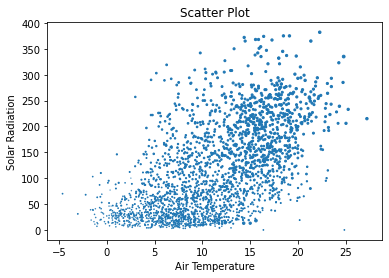

In [ ]:
plt.scatter(df_weather["Air_temp_avg"],df_weather["Solar_radiation"], df_weather["Et0_result"])
# Adding Title to the Plot
plt.title("Scatter Plot")
  
# Setting the X and Y labels
plt.xlabel('Air Temperature')
plt.ylabel('Solar Radiation')
  
plt.show()

<AxesSubplot:xlabel='Et0_result', ylabel='Air_temp_avg'>

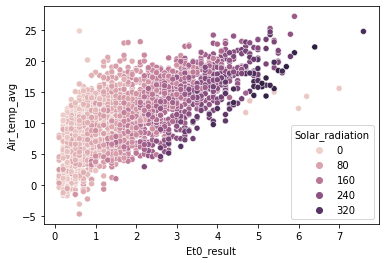

In [ ]:
sns.scatterplot(data=df_weather, x='Et0_result', y='Air_temp_avg', hue='Solar_radiation')

In [ ]:
# these two are used as features and will be combined with the plants data
ET_WD_Combo = df_weather[['Weather_dt','Et0_result']]

In [ ]:
ET_WD_Combo

,Weather_dt,Et0_result
new_weather_date,,
2014-05-14,2014-05-14,NaN
2014-05-15,2014-05-15,3.6
2014-05-16,2014-05-16,2.9
2014-05-17,2014-05-17,3.6
2014-05-18,2014-05-18,4.2
...,...,...
2021-05-16,2021-05-16,NaN
2021-05-17,2021-05-17,NaN
2021-05-18,2021-05-18,3.4


In [ ]:
ET_WD_Combo.iloc[2119]

Weather_dt    2020-04-11 00:00:00
Et0_result                    3.7
Name: 2020-04-11 00:00:00, dtype: object

In [ ]:
ET_WD_Combo.iloc[2257]

Weather_dt    2020-08-27 00:00:00
Et0_result                    1.6
Name: 2020-08-27 00:00:00, dtype: object

Considering only for the year 2020

In [ ]:
New_Weather = ET_WD_Combo.iloc[2119:2257]

In [ ]:
New_Weather.reset_index(inplace=True)

In [ ]:
New_Weather

,new_weather_date,Weather_dt,Et0_result
0,2020-04-11,2020-04-11,3.7
1,2020-04-12,2020-04-12,3.6
2,2020-04-13,2020-04-13,2.4
3,2020-04-14,2020-04-14,2.5
4,2020-04-15,2020-04-15,3.2
...,...,...,...
133,2020-08-22,2020-08-22,4.4
134,2020-08-23,2020-08-23,3.1
135,2020-08-24,2020-08-24,3.5
136,2020-08-25,2020-08-25,2.8


Now we merge the data from 'weather' dataset with 'plants' data as another feature for the model to train.

In [ ]:
data= New_Weather.join(data.set_index('plant_dt'), on='Weather_dt',rsuffix='.')

In [ ]:
data

,new_weather_date,Weather_dt,Et0_result,batch_num,cls,fresh_wt,head_wt,radial_diam,polar_diam,leaves,leaf_area,square_id,check_date,remove,Flight_dt
0,2020-04-11,2020-04-11,3.7,402.0,3.0,15.0,NaN,NaN,NaN,10.00,185.0,208.0,2020-04-30,NaN,2020-04-30
0,2020-04-11,2020-04-11,3.7,402.0,4.0,15.0,NaN,NaN,NaN,11.00,156.0,208.0,2020-04-30,NaN,2020-04-30
0,2020-04-11,2020-04-11,3.7,402.0,1.0,16.0,NaN,NaN,NaN,12.00,137.0,208.0,2020-04-30,NaN,2020-04-30
0,2020-04-11,2020-04-11,3.7,402.0,3.0,15.0,NaN,NaN,NaN,10.00,225.0,208.0,2020-04-30,NaN,2020-04-30
0,2020-04-11,2020-04-11,3.7,402.0,3.0,15.0,NaN,NaN,NaN,11.00,157.0,208.0,2020-04-30,NaN,2020-04-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,2020-08-26,2020-08-26,3.0,735.0,4.0,438.0,87.0,110.0,130.0,17.07,573.0,189.0,2020-10-23,NaN,NaT
137,2020-08-26,2020-08-26,3.0,735.0,5.0,213.0,118.0,116.0,120.0,17.07,552.0,189.0,2020-10-23,NaN,NaT
137,2020-08-26,2020-08-26,3.0,735.0,5.0,459.0,115.0,110.0,123.0,17.07,570.0,189.0,2020-10-23,NaN,NaT
137,2020-08-26,2020-08-26,3.0,735.0,1.0,355.0,33.0,70.0,80.0,17.07,563.0,189.0,2020-10-23,NaN,NaT


In [ ]:
data.reset_index(inplace=True)
data.drop(['index'],axis=1,inplace=True)

In [ ]:
data

,new_weather_date,Weather_dt,Et0_result,batch_num,cls,fresh_wt,head_wt,radial_diam,polar_diam,leaves,leaf_area,square_id,check_date,remove,Flight_dt
0,2020-04-11,2020-04-11,3.7,402.0,3.0,15.0,NaN,NaN,NaN,10.00,185.0,208.0,2020-04-30,NaN,2020-04-30
1,2020-04-11,2020-04-11,3.7,402.0,4.0,15.0,NaN,NaN,NaN,11.00,156.0,208.0,2020-04-30,NaN,2020-04-30
2,2020-04-11,2020-04-11,3.7,402.0,1.0,16.0,NaN,NaN,NaN,12.00,137.0,208.0,2020-04-30,NaN,2020-04-30
3,2020-04-11,2020-04-11,3.7,402.0,3.0,15.0,NaN,NaN,NaN,10.00,225.0,208.0,2020-04-30,NaN,2020-04-30
4,2020-04-11,2020-04-11,3.7,402.0,3.0,15.0,NaN,NaN,NaN,11.00,157.0,208.0,2020-04-30,NaN,2020-04-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4369,2020-08-26,2020-08-26,3.0,735.0,4.0,438.0,87.0,110.0,130.0,17.07,573.0,189.0,2020-10-23,NaN,NaT
4370,2020-08-26,2020-08-26,3.0,735.0,5.0,213.0,118.0,116.0,120.0,17.07,552.0,189.0,2020-10-23,NaN,NaT
4371,2020-08-26,2020-08-26,3.0,735.0,5.0,459.0,115.0,110.0,123.0,17.07,570.0,189.0,2020-10-23,NaN,NaT
4372,2020-08-26,2020-08-26,3.0,735.0,1.0,355.0,33.0,70.0,80.0,17.07,563.0,189.0,2020-10-23,NaN,NaT


Cleaning the planting dataset

In [ ]:
df_planting

,Crop,Column2,Column3,Plant_Date,Column1,Region,Column4,Planting_Batch,Volume_Planted,Planting_Wk
0,3,NaN,NaN,2020-02-06 00:00:00,NaN,0.0,NaN,392,198912.0,6.0
1,3,NaN,NaN,2020-02-07 00:00:00,NaN,0.0,NaN,503,63840.0,6.0
2,3,NaN,NaN,2020-02-07 00:00:00,NaN,0.0,NaN,614,179928.0,6.0
3,3,NaN,NaN,2020-02-08 00:00:00,NaN,0.0,NaN,725,200256.0,6.0
4,3,NaN,NaN,2020-02-10 00:00:00,NaN,0.0,NaN,770,13944.0,7.0
...,...,...,...,...,...,...,...,...,...,...
2368,Ice 309,NaN,NaN,"2,1",NaN,387.0,NaN,NaN,NaN,80.0
2369,Ice 309,NaN,NaN,"2,2",NaN,400.0,NaN,NaN,NaN,274.0
2370,Ice 309,NaN,NaN,"2,3",NaN,319.0,NaN,NaN,NaN,224.0
2371,Ice 309,NaN,NaN,"2,4",NaN,155.0,NaN,NaN,NaN,249.0


In [ ]:
df_planting.isna().sum()
df_planting.drop(['Column2','Column3','Column1','Column4'],axis=1,inplace=True)
df_planting.dropna(inplace=True)
df_planting

,Crop,Plant_Date,Region,Planting_Batch,Volume_Planted,Planting_Wk
0,3,2020-02-06 00:00:00,0.0,392,198912.0,6.0
1,3,2020-02-07 00:00:00,0.0,503,63840.0,6.0
2,3,2020-02-07 00:00:00,0.0,614,179928.0,6.0
3,3,2020-02-08 00:00:00,0.0,725,200256.0,6.0
4,3,2020-02-10 00:00:00,0.0,770,13944.0,7.0
...,...,...,...,...,...,...
1816,1,2020-08-12 00:00:00,1.0,158,142500.0,33.0
1817,1,2020-08-21 00:00:00,1.0,388,98208.0,34.0
1818,1,2020-08-25 00:00:00,1.0,390,256358.0,35.0
1819,1,2020-08-27 00:00:00,1.0,389,85500.0,35.0


In [ ]:
df_planting.iloc[281]

Crop                                3
Plant_Date        2020-04-11 00:00:00
Region                            0.0
Planting_Batch                    401
Volume_Planted                52920.0
Planting_Wk                      15.0
Name: 281, dtype: object

In [ ]:
New_planting = df_planting.iloc[281:]
New_planting

,Crop,Plant_Date,Region,Planting_Batch,Volume_Planted,Planting_Wk
281,3,2020-04-11 00:00:00,0.0,401,52920.0,15.0
282,3,2020-04-11 00:00:00,0.0,402,155232.0,15.0
283,4,2020-04-13 00:00:00,0.0,819,48710.0,16.0
284,0,2020-04-03 00:00:00,0.0,274,215192.0,14.0
285,0,2020-04-02 00:00:00,0.0,275,151077.0,14.0
...,...,...,...,...,...,...
1816,1,2020-08-12 00:00:00,1.0,158,142500.0,33.0
1817,1,2020-08-21 00:00:00,1.0,388,98208.0,34.0
1818,1,2020-08-25 00:00:00,1.0,390,256358.0,35.0
1819,1,2020-08-27 00:00:00,1.0,389,85500.0,35.0


In [ ]:
data= New_planting.join(data.set_index('batch_num'), on='Planting_Batch',rsuffix='.')

In [ ]:
data

,Crop,Plant_Date,Region,Planting_Batch,Volume_Planted,Planting_Wk,new_weather_date,Weather_dt,Et0_result,cls,fresh_wt,head_wt,radial_diam,polar_diam,leaves,leaf_area,square_id,check_date,remove,Flight_dt
281,3,2020-04-11 00:00:00,0.0,401,52920.0,15.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT
282,3,2020-04-11 00:00:00,0.0,402,155232.0,15.0,2020-04-11,2020-04-11,3.7,3.0,15.0,NaN,NaN,NaN,10.0,185.0,208.0,2020-04-30,NaN,2020-04-30
282,3,2020-04-11 00:00:00,0.0,402,155232.0,15.0,2020-04-11,2020-04-11,3.7,4.0,15.0,NaN,NaN,NaN,11.0,156.0,208.0,2020-04-30,NaN,2020-04-30
282,3,2020-04-11 00:00:00,0.0,402,155232.0,15.0,2020-04-11,2020-04-11,3.7,1.0,16.0,NaN,NaN,NaN,12.0,137.0,208.0,2020-04-30,NaN,2020-04-30
282,3,2020-04-11 00:00:00,0.0,402,155232.0,15.0,2020-04-11,2020-04-11,3.7,3.0,15.0,NaN,NaN,NaN,10.0,225.0,208.0,2020-04-30,NaN,2020-04-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1816,1,2020-08-12 00:00:00,1.0,158,142500.0,33.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT
1817,1,2020-08-21 00:00:00,1.0,388,98208.0,34.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT
1818,1,2020-08-25 00:00:00,1.0,390,256358.0,35.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT
1819,1,2020-08-27 00:00:00,1.0,389,85500.0,35.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT


In [ ]:
data.reset_index(inplace=True)
data.drop(['index'],axis=1,inplace=True)
data.isna().sum()

Crop                   0
Plant_Date             0
Region                 0
Planting_Batch         0
Volume_Planted         0
Planting_Wk            0
new_weather_date    1479
Weather_dt          1479
Et0_result          1479
cls                 1479
fresh_wt            1480
head_wt             1584
radial_diam         1584
polar_diam          1584
leaves              1479
leaf_area           1480
square_id           1479
check_date          1479
remove              5751
Flight_dt           2457
dtype: int64

In [ ]:
data

,Crop,Plant_Date,Region,Planting_Batch,Volume_Planted,Planting_Wk,new_weather_date,Weather_dt,Et0_result,cls,fresh_wt,head_wt,radial_diam,polar_diam,leaves,leaf_area,square_id,check_date,remove,Flight_dt
0,3,2020-04-11 00:00:00,0.0,401,52920.0,15.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT
1,3,2020-04-11 00:00:00,0.0,402,155232.0,15.0,2020-04-11,2020-04-11,3.7,3.0,15.0,NaN,NaN,NaN,10.0,185.0,208.0,2020-04-30,NaN,2020-04-30
2,3,2020-04-11 00:00:00,0.0,402,155232.0,15.0,2020-04-11,2020-04-11,3.7,4.0,15.0,NaN,NaN,NaN,11.0,156.0,208.0,2020-04-30,NaN,2020-04-30
3,3,2020-04-11 00:00:00,0.0,402,155232.0,15.0,2020-04-11,2020-04-11,3.7,1.0,16.0,NaN,NaN,NaN,12.0,137.0,208.0,2020-04-30,NaN,2020-04-30
4,3,2020-04-11 00:00:00,0.0,402,155232.0,15.0,2020-04-11,2020-04-11,3.7,3.0,15.0,NaN,NaN,NaN,10.0,225.0,208.0,2020-04-30,NaN,2020-04-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5746,1,2020-08-12 00:00:00,1.0,158,142500.0,33.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT
5747,1,2020-08-21 00:00:00,1.0,388,98208.0,34.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT
5748,1,2020-08-25 00:00:00,1.0,390,256358.0,35.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT
5749,1,2020-08-27 00:00:00,1.0,389,85500.0,35.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT


In [ ]:
data.dtypes

Crop                        object
Plant_Date                  object
Region                     float64
Planting_Batch              object
Volume_Planted             float64
Planting_Wk                float64
new_weather_date    datetime64[ns]
Weather_dt          datetime64[ns]
Et0_result                 float64
cls                        float64
fresh_wt                   float64
head_wt                    float64
radial_diam                float64
polar_diam                 float64
leaves                     float64
leaf_area                  float64
square_id                  float64
check_date          datetime64[ns]
remove                      object
Flight_dt           datetime64[ns]
dtype: object

In [ ]:
data['Plant_Date'] = pd.to_datetime(data['Plant_Date'])
data.dropna(subset=[n for n in data if n != 'remove'],inplace= True)
data.reset_index(inplace=True)
data.drop(['index'],axis=1,inplace=True)

In [ ]:
data

,Crop,Plant_Date,Region,Planting_Batch,Volume_Planted,Planting_Wk,new_weather_date,Weather_dt,Et0_result,cls,fresh_wt,head_wt,radial_diam,polar_diam,leaves,leaf_area,square_id,check_date,remove,Flight_dt
0,3,2020-04-11,0.0,402,155232.0,15.0,2020-04-11,2020-04-11,3.7,2.0,213.0,13.0,55.0,55.0,17.07,730.0,570.0,2020-05-22,NaN,2020-04-30
1,3,2020-04-11,0.0,402,155232.0,15.0,2020-04-11,2020-04-11,3.7,5.0,179.0,10.0,40.0,40.0,17.07,643.0,570.0,2020-05-22,NaN,2020-04-30
2,3,2020-04-11,0.0,402,155232.0,15.0,2020-04-11,2020-04-11,3.7,5.0,183.0,13.0,50.0,50.0,17.07,647.0,570.0,2020-05-22,NaN,2020-04-30
3,3,2020-04-11,0.0,402,155232.0,15.0,2020-04-11,2020-04-11,3.7,3.0,176.0,7.0,40.0,40.0,17.07,694.0,570.0,2020-05-22,NaN,2020-04-30
4,3,2020-04-11,0.0,402,155232.0,15.0,2020-04-11,2020-04-11,3.7,1.0,192.0,22.0,70.0,70.0,17.07,730.0,570.0,2020-05-22,NaN,2020-04-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3191,3,2020-08-08,0.0,693,133056.0,32.0,2020-08-08,2020-08-08,4.3,1.0,81.0,8.0,36.0,40.0,17.07,247.0,290.0,2020-09-17,NaN,2020-09-10
3192,3,2020-08-08,0.0,693,133056.0,32.0,2020-08-08,2020-08-08,4.3,1.0,103.0,8.0,40.0,50.0,17.07,211.0,290.0,2020-09-17,NaN,2020-09-10
3193,3,2020-08-08,0.0,693,133056.0,32.0,2020-08-08,2020-08-08,4.3,3.0,132.0,6.0,40.0,40.0,17.07,337.0,290.0,2020-09-17,NaN,2020-09-10
3194,3,2020-08-08,0.0,693,133056.0,32.0,2020-08-08,2020-08-08,4.3,2.0,183.0,10.0,50.0,45.0,17.07,370.0,290.0,2020-09-17,NaN,2020-09-10


To check how much the crop has grown we have plant data and then check date, where the crop is almost grown to its peak. Hence, making a new column will help us know with this information.

In [ ]:
data['Remaining_days']  = (data['check_date'] - data['Plant_Date']).dt.days

In [ ]:
data

,Crop,Plant_Date,Region,Planting_Batch,Volume_Planted,Planting_Wk,new_weather_date,Weather_dt,Et0_result,cls,...,head_wt,radial_diam,polar_diam,leaves,leaf_area,square_id,check_date,remove,Flight_dt,Remaining_days
0,3,2020-04-11,0.0,402,155232.0,15.0,2020-04-11,2020-04-11,3.7,2.0,...,13.0,55.0,55.0,17.07,730.0,570.0,2020-05-22,NaN,2020-04-30,41
1,3,2020-04-11,0.0,402,155232.0,15.0,2020-04-11,2020-04-11,3.7,5.0,...,10.0,40.0,40.0,17.07,643.0,570.0,2020-05-22,NaN,2020-04-30,41
2,3,2020-04-11,0.0,402,155232.0,15.0,2020-04-11,2020-04-11,3.7,5.0,...,13.0,50.0,50.0,17.07,647.0,570.0,2020-05-22,NaN,2020-04-30,41
3,3,2020-04-11,0.0,402,155232.0,15.0,2020-04-11,2020-04-11,3.7,3.0,...,7.0,40.0,40.0,17.07,694.0,570.0,2020-05-22,NaN,2020-04-30,41
4,3,2020-04-11,0.0,402,155232.0,15.0,2020-04-11,2020-04-11,3.7,1.0,...,22.0,70.0,70.0,17.07,730.0,570.0,2020-05-22,NaN,2020-04-30,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3191,3,2020-08-08,0.0,693,133056.0,32.0,2020-08-08,2020-08-08,4.3,1.0,...,8.0,36.0,40.0,17.07,247.0,290.0,2020-09-17,NaN,2020-09-10,40
3192,3,2020-08-08,0.0,693,133056.0,32.0,2020-08-08,2020-08-08,4.3,1.0,...,8.0,40.0,50.0,17.07,211.0,290.0,2020-09-17,NaN,2020-09-10,40
3193,3,2020-08-08,0.0,693,133056.0,32.0,2020-08-08,2020-08-08,4.3,3.0,...,6.0,40.0,40.0,17.07,337.0,290.0,2020-09-17,NaN,2020-09-10,40
3194,3,2020-08-08,0.0,693,133056.0,32.0,2020-08-08,2020-08-08,4.3,2.0,...,10.0,50.0,45.0,17.07,370.0,290.0,2020-09-17,NaN,2020-09-10,40


Finally we can now divide the dates into Day, Month Year for the diffrent date columns in the dataset, and convert the datatypes as well.

In [ ]:
data['plant_day'] = data['Plant_Date'].dt.day
data['plant_month'] = data['Plant_Date'].dt.month
data['plant_year'] = data['Plant_Date'].dt.year

In [ ]:
data['check_day'] = data['check_date'].dt.day
data['check_month'] = data['check_date'].dt.month
data['check_year'] = data['check_date'].dt.year

In [ ]:
data['weather_day'] = data['Weather_dt'].dt.day
data['weather_month'] = data['Weather_dt'].dt.month
data['weather_year'] = data['Weather_dt'].dt.year

In [ ]:
data['flight_day'] = data['Flight_dt'].dt.day
data['flight_month'] = data['Flight_dt'].dt.month
data['flight_year'] = data['Flight_dt'].dt.year

In [ ]:
data.drop(['new_weather_date','Plant_Date','check_date','Weather_dt','Flight_dt'],axis=1,inplace=True)

In [ ]:
data

,Crop,Region,Planting_Batch,Volume_Planted,Planting_Wk,Et0_result,cls,fresh_wt,head_wt,radial_diam,...,plant_year,check_day,check_month,check_year,weather_day,weather_month,weather_year,flight_day,flight_month,flight_year
0,3,0.0,402,155232.0,15.0,3.7,2.0,213.0,13.0,55.0,...,2020,22,5,2020,11,4,2020,30,4,2020
1,3,0.0,402,155232.0,15.0,3.7,5.0,179.0,10.0,40.0,...,2020,22,5,2020,11,4,2020,30,4,2020
2,3,0.0,402,155232.0,15.0,3.7,5.0,183.0,13.0,50.0,...,2020,22,5,2020,11,4,2020,30,4,2020
3,3,0.0,402,155232.0,15.0,3.7,3.0,176.0,7.0,40.0,...,2020,22,5,2020,11,4,2020,30,4,2020
4,3,0.0,402,155232.0,15.0,3.7,1.0,192.0,22.0,70.0,...,2020,22,5,2020,11,4,2020,30,4,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3191,3,0.0,693,133056.0,32.0,4.3,1.0,81.0,8.0,36.0,...,2020,17,9,2020,8,8,2020,10,9,2020
3192,3,0.0,693,133056.0,32.0,4.3,1.0,103.0,8.0,40.0,...,2020,17,9,2020,8,8,2020,10,9,2020
3193,3,0.0,693,133056.0,32.0,4.3,3.0,132.0,6.0,40.0,...,2020,17,9,2020,8,8,2020,10,9,2020
3194,3,0.0,693,133056.0,32.0,4.3,2.0,183.0,10.0,50.0,...,2020,17,9,2020,8,8,2020,10,9,2020


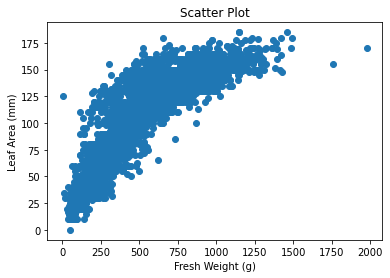

In [ ]:
plt.scatter(data['fresh_wt'], data['radial_diam'])
  
# Adding Title to the Plot
plt.title("Scatter Plot")
  
# Setting the X and Y labels
plt.xlabel('Fresh Weight (g)')
plt.ylabel('Leaf Area (mm)')
  
plt.show()

# Final Processed Data

In [ ]:
X= data.drop(['head_wt','radial_diam'],axis=1)

In [ ]:
X.drop(['remove'],axis=1,inplace=True)

In [ ]:
X

,Crop,Region,Planting_Batch,Volume_Planted,Planting_Wk,Et0_result,cls,fresh_wt,polar_diam,leaves,...,plant_year,check_day,check_month,check_year,weather_day,weather_month,weather_year,flight_day,flight_month,flight_year
0,3,0.0,402,155232.0,15.0,3.7,2.0,213.0,55.0,17.07,...,2020,22,5,2020,11,4,2020,30,4,2020
1,3,0.0,402,155232.0,15.0,3.7,5.0,179.0,40.0,17.07,...,2020,22,5,2020,11,4,2020,30,4,2020
2,3,0.0,402,155232.0,15.0,3.7,5.0,183.0,50.0,17.07,...,2020,22,5,2020,11,4,2020,30,4,2020
3,3,0.0,402,155232.0,15.0,3.7,3.0,176.0,40.0,17.07,...,2020,22,5,2020,11,4,2020,30,4,2020
4,3,0.0,402,155232.0,15.0,3.7,1.0,192.0,70.0,17.07,...,2020,22,5,2020,11,4,2020,30,4,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3191,3,0.0,693,133056.0,32.0,4.3,1.0,81.0,40.0,17.07,...,2020,17,9,2020,8,8,2020,10,9,2020
3192,3,0.0,693,133056.0,32.0,4.3,1.0,103.0,50.0,17.07,...,2020,17,9,2020,8,8,2020,10,9,2020
3193,3,0.0,693,133056.0,32.0,4.3,3.0,132.0,40.0,17.07,...,2020,17,9,2020,8,8,2020,10,9,2020
3194,3,0.0,693,133056.0,32.0,4.3,2.0,183.0,45.0,17.07,...,2020,17,9,2020,8,8,2020,10,9,2020


In [ ]:
y = data[['head_wt','radial_diam','polar_diam','Remaining_days']]

In [ ]:
y

,head_wt,radial_diam,polar_diam,Remaining_days
0,13.0,55.0,55.0,41
1,10.0,40.0,40.0,41
2,13.0,50.0,50.0,41
3,7.0,40.0,40.0,41
4,22.0,70.0,70.0,41
...,...,...,...,...
3191,8.0,36.0,40.0,40
3192,8.0,40.0,50.0,40
3193,6.0,40.0,40.0,40
3194,10.0,50.0,45.0,40


In [ ]:
scaled = StandardScaler()

In [ ]:
X = scaled.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear Regression

No cross validation and Gridsearch used

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
LR= LinearRegression()

In [ ]:
LR.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = LR.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9517980598445761


For further predictions, 5 fold cross validation is very powerful.

In [ ]:
LR_params = {'fit_intercept':[True,False], 'copy_X':[True, False]}
KF = KFold(n_splits=5, shuffle=True, random_state=4)
CLF = GridSearchCV(estimator=LR, param_grid = LR_params, cv = KF, scoring='r2', n_jobs = 1, return_train_score=True)
CLF.fit(X_train, y_train)
print(CLF.best_params_)
print(CLF.best_score_)

{'copy_X': True, 'fit_intercept': False}
0.951534591902122


# Random Forest Regression

In [ ]:
RF = RandomForestRegressor()
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
print(r2_score(y_test,y_pred))

0.9507599891118055


Again no cross validation and Gridsearch

In [ ]:
from sklearn.multioutput import MultiOutputRegressor

In [ ]:
classifier= MultiOutputRegressor(RandomForestRegressor(max_depth=5, bootstrap = True, max_features= 'auto',n_estimators = 100,min_samples_leaf = 3,min_samples_split = 10,random_state=0))
classifier.fit(X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(max_depth=5,
                                                     min_samples_leaf=3,
                                                     min_samples_split=10,
                                                     random_state=0))

In [ ]:
classifier.score(X_test, y_test, sample_weight=None)

0.9641932202086824

In [ ]:
classifier_grid = MultiOutputRegressor(RandomForestRegressor())

In [ ]:
# create a grid of parameters 

random_grid = {'estimator__n_estimators':[100,150,200],
               'estimator__max_features': ['sqrt','auto'],
               'estimator__max_depth': [3,4,5]}

In [ ]:
# search for the best parameters

RF_grid = GridSearchCV(classifier_grid,  random_grid, cv = 3)

RF_grid = RF_grid.fit(X_train, y_train)

In [ ]:
RF_grid.best_params_

{'estimator__max_depth': 5,
 'estimator__max_features': 'auto',
 'estimator__n_estimators': 100}

In [ ]:
RF_grid.score(X_test, y_test)

0.9641074936609152